### 8 Ejercicios y Problemas. 

1. Suponga que usted es el jefe de gobierno y está interesado en que pasen los proyectos de su
programa político. Sin embargo, en el congreso conformado por 5 partidos, no es fácil su tránsito,
por lo que debe repartir el poder, conformado por ministerios y otras agencias del gobierno, con
base en la representación de cada partido. Cada entidad estatal tiene un peso de poder, que es el
que se debe distribuir. Suponga que hay 50 curules, distribuya aleatoriamente, con una distribución
no informe entre los 5 partidos esas curules. Defina una lista de 50 entidades y asígneles
aleatoriamente un peso político de 1 a 100 puntos. Cree una matriz de poder para repartir ese
poder, usando AGs

Distribución de curules por partido:
Partido A: 17 curules
Partido B: 11 curules
Partido C: 6 curules
Partido D: 5 curules
Partido E: 11 curules

Pesos políticos de las entidades:
Entidad 1: 82 puntos
Entidad 2: 7 puntos
Entidad 3: 67 puntos
Entidad 4: 44 puntos
Entidad 5: 64 puntos
Entidad 6: 66 puntos
Entidad 7: 14 puntos
Entidad 8: 98 puntos
Entidad 9: 49 puntos
Entidad 10: 94 puntos
Entidad 11: 25 puntos
Entidad 12: 39 puntos
Entidad 13: 55 puntos
Entidad 14: 36 puntos
Entidad 15: 12 puntos
Entidad 16: 19 puntos
Entidad 17: 92 puntos
Entidad 18: 60 puntos
Entidad 19: 45 puntos
Entidad 20: 66 puntos
Entidad 21: 10 puntos
Entidad 22: 89 puntos
Entidad 23: 73 puntos
Entidad 24: 66 puntos
Entidad 25: 33 puntos
Entidad 26: 84 puntos
Entidad 27: 89 puntos
Entidad 28: 59 puntos
Entidad 29: 22 puntos
Entidad 30: 45 puntos
Entidad 31: 7 puntos
Entidad 32: 86 puntos
Entidad 33: 7 puntos
Entidad 34: 33 puntos
Entidad 35: 30 puntos
Entidad 36: 95 puntos
Entidad 37: 98 puntos
Entidad 38: 82 pun

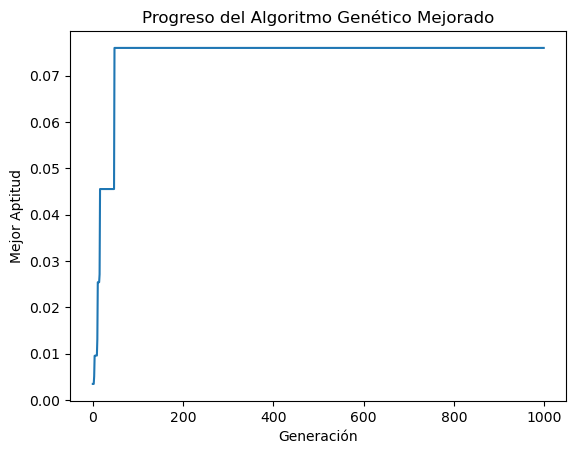


Distribución de poder óptima:
Partido A: ['Entidad 6', 'Entidad 15', 'Entidad 17', 'Entidad 18', 'Entidad 19', 'Entidad 21', 'Entidad 22', 'Entidad 23', 'Entidad 28', 'Entidad 30', 'Entidad 32', 'Entidad 38', 'Entidad 40', 'Entidad 41', 'Entidad 43', 'Entidad 44', 'Entidad 45'] (Poder total: 924 puntos)
Partido B: ['Entidad 5', 'Entidad 24', 'Entidad 27', 'Entidad 29', 'Entidad 36', 'Entidad 37', 'Entidad 39', 'Entidad 48'] (Poder total: 601 puntos)
Partido C: ['Entidad 7', 'Entidad 8', 'Entidad 9', 'Entidad 11', 'Entidad 13', 'Entidad 35', 'Entidad 42'] (Poder total: 326 puntos)
Partido D: ['Entidad 10', 'Entidad 20', 'Entidad 25', 'Entidad 34', 'Entidad 50'] (Poder total: 272 puntos)
Partido E: ['Entidad 1', 'Entidad 2', 'Entidad 3', 'Entidad 4', 'Entidad 12', 'Entidad 14', 'Entidad 16', 'Entidad 26', 'Entidad 31', 'Entidad 33', 'Entidad 46', 'Entidad 47', 'Entidad 49'] (Poder total: 591 puntos)


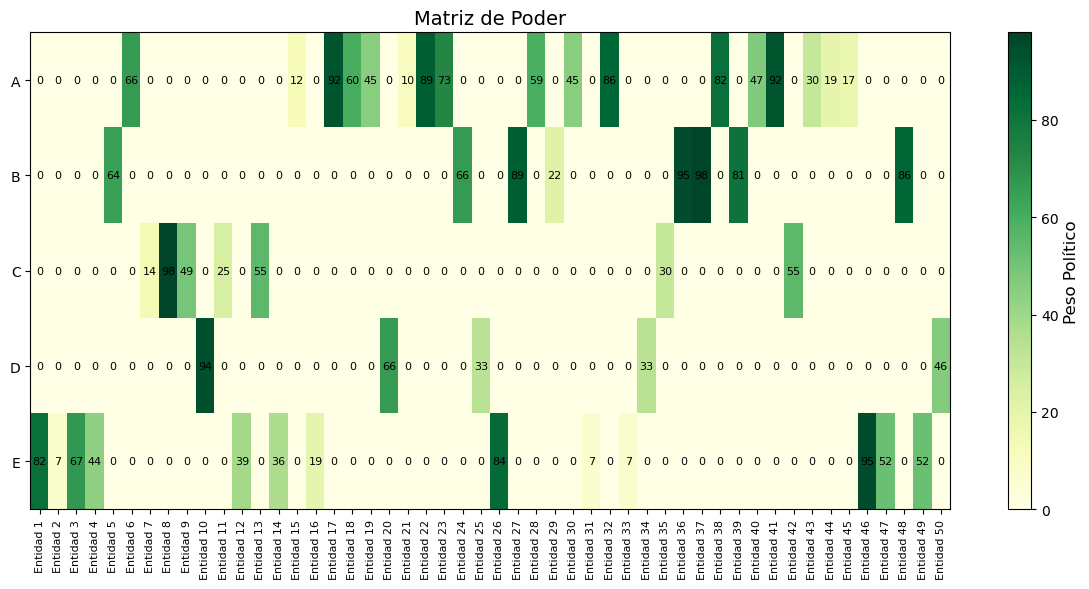

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definiciones iniciales
total_curules = 50
partidos = ['A', 'B', 'C', 'D', 'E']
curules_por_partido = np.random.multinomial(total_curules, [0.3, 0.25, 0.15, 0.2, 0.1])

print("Distribución de curules por partido:")
for i in range(len(partidos)):
    print(f"Partido {partidos[i]}: {curules_por_partido[i]} curules")

# Definir entidades y asignar pesos
entidades = ['Entidad ' + str(i+1) for i in range(total_curules)]
pesos_politicos = np.random.randint(1, 101, total_curules)

print("\nPesos políticos de las entidades:")
for i in range(total_curules):
    print(f"{entidades[i]}: {pesos_politicos[i]} puntos")

# Función de evaluación (aptitud)
def evaluar_distribucion(distribucion, pesos_politicos, curules_por_partido):
    partido_poder = [0] * len(partidos)
    for i in range(len(distribucion)):
        partido_poder[distribucion[i]] += pesos_politicos[i]
    
    diferencia_total = sum(abs(partido_poder[i] - sum(pesos_politicos) * curules_por_partido[i] / total_curules) for i in range(len(partidos)))
    
    # Normalización de la diferencia para que no dé valores tan pequeños
    return 1 / (1 + diferencia_total)

# Algoritmo Genético mejorado
def algoritmo_genetico(pesos_politicos, curules_por_partido, tamano_poblacion=300, num_generaciones=1000, elitismo=0.2, prob_mutacion_inicial=0.1):
    poblacion = [np.random.randint(0, len(partidos), total_curules) for _ in range(tamano_poblacion)]
    
    mejor_aptitud_por_generacion = []  # Guardar el mejor puntaje por generación
    
    for generacion in range(num_generaciones):
        # Ajuste dinámico de la tasa de mutación (disminuye con el tiempo)
        prob_mutacion = prob_mutacion_inicial * (1 - generacion / num_generaciones)
        
        # Evaluación de la población
        aptitudes = [evaluar_distribucion(distribucion, pesos_politicos, curules_por_partido) for distribucion in poblacion]
        
        # Guardar el mejor puntaje de la generación
        mejor_aptitud = max(aptitudes)
        mejor_aptitud_por_generacion.append(mejor_aptitud)
        
        # Mostrar progreso en la consola
        if generacion % 100 == 0 or generacion == num_generaciones - 1:
            print(f"Generación {generacion}: Mejor aptitud = {mejor_aptitud:.4f}")
        
        # Selección basada en aptitud
        indices_padres = np.random.choice(tamano_poblacion, size=tamano_poblacion, replace=True, p=np.array(aptitudes) / sum(aptitudes))
        poblacion_nueva = [poblacion[indice] for indice in indices_padres]
        
        # Elitismo: mantener un porcentaje de los mejores individuos
        num_elites = int(elitismo * tamano_poblacion)
        mejores_individuos = [poblacion[np.argmax(aptitudes)] for _ in range(num_elites)]
        
        # Reemplazar los peores con los mejores
        poblacion_nueva[:num_elites] = mejores_individuos
        
        # Cruce (Cross-over uniforme)
        for i in range(num_elites, tamano_poblacion - 1, 2):
            if np.random.rand() < 0.8:  # Probabilidad de cruce
                punto_cruce = np.random.randint(0, total_curules)
                hijo1 = np.concatenate([poblacion_nueva[i][:punto_cruce], poblacion_nueva[i+1][punto_cruce:]])
                hijo2 = np.concatenate([poblacion_nueva[i+1][:punto_cruce], poblacion_nueva[i][punto_cruce:]])
                poblacion_nueva[i], poblacion_nueva[i+1] = hijo1, hijo2
        
        # Mutación adaptativa
        for i in range(num_elites, tamano_poblacion):  # No mutar a los élites
            if np.random.rand() < prob_mutacion:
                indice_cambio = np.random.randint(0, total_curules)
                poblacion_nueva[i][indice_cambio] = np.random.randint(0, len(partidos))
        
        # Diversificación: Introducir algunos individuos aleatorios en cada generación
        for i in range(int(tamano_poblacion * 0.02)):  # Reemplaza el 2% de la población con nuevos individuos
            poblacion_nueva[-i] = np.random.randint(0, len(partidos), total_curules)
        
        poblacion = poblacion_nueva
    
    aptitudes_finales = [evaluar_distribucion(distribucion, pesos_politicos, curules_por_partido) for distribucion in poblacion]
    mejor_distribucion = poblacion[np.argmax(aptitudes_finales)]
    
    # Visualizar el progreso del AG
    plt.plot(range(num_generaciones), mejor_aptitud_por_generacion)
    plt.title("Progreso del Algoritmo Genético Mejorado")
    plt.xlabel("Generación")
    plt.ylabel("Mejor Aptitud")
    plt.show()
    
    return mejor_distribucion

# Ejecutar el algoritmo genético y visualizar las iteraciones
mejor_distribucion = algoritmo_genetico(pesos_politicos, curules_por_partido, num_generaciones=1000)

# Mostrar la distribución óptima de poder
print("\nDistribución de poder óptima:")
matriz_poder = np.zeros((len(partidos), total_curules), dtype=int)
for i in range(len(partidos)):
    entidades_partido = [entidades[j] for j in range(total_curules) if mejor_distribucion[j] == i]
    poder_partido = sum(pesos_politicos[j] for j in range(total_curules) if mejor_distribucion[j] == i)
    print(f"Partido {partidos[i]}: {entidades_partido} (Poder total: {poder_partido} puntos)")
    
    for j in range(total_curules):
        if mejor_distribucion[j] == i:
            matriz_poder[i, j] = pesos_politicos[j]

# Visualización de la matriz de poder
fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(matriz_poder, cmap='YlGn', aspect='auto')

# Etiquetas en el gráfico
ax.set_xticks(np.arange(total_curules))
ax.set_yticks(np.arange(len(partidos)))
ax.set_xticklabels(entidades, rotation=90, fontsize=8)
ax.set_yticklabels(partidos, fontsize=10)

# Colocar los valores de los pesos en cada celda
for i in range(len(partidos)):
    for j in range(total_curules):
        text = ax.text(j, i, matriz_poder[i, j], ha='center', va='center', color='black', fontsize=8)

# Configuración del título y la barra de color
ax.set_title('Matriz de Poder', fontsize=14)
fig.tight_layout()

cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Peso Político', fontsize=12)

# Mostrar el gráfico
plt.show()


### 8 Ejercicios y Problemas. 

1. Una empresa proveedora de energía eléctrica dispone de cuatro plantas de generación para
satisfacer la demanda diaria de energía eléctrica en Cali, Bogotá, Medellín y Barranquilla. Cada una
puede generar 3, 6, 5 y 4 GW al día respectivamente. Las necesidades de Cali, Bogotá, Medellín y
Barranquilla son de 4, 3, 5 y 3 GW al día respectivamente. Los costos por el transporte de energía
por cada GW entre plantas y ciudades se dan en la siguiente tabla: 

![alt text](image.png)

Los costos del KW-H por generador se dan en la siguiente tabla:


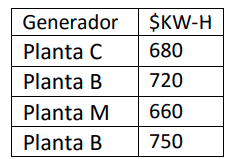

In [1]:
import random
import numpy as np
from deap import base, creator, tools, algorithms


Datos del Problema


In [2]:
# Costos de generación ($ por GW)
generation_cost = {
    'c': 680,
    'b': 720,
    'M': 660,
    'a': 750
}

# Capacidades de las plantas (GW)
plant_capacity = {
    'c': 3,
    'b': 6,
    'M': 5,
    'a': 4
}

# Demandas de las ciudades (GW)
city_demand = {
    'Cali': 4,
    'Bogota': 3,
    'Medellin': 5,
    'Barranquilla': 3
}

# Costos de transporte ($ por GW)
transport_cost = {
    'c': {'Cali': 1, 'Bogota': 4, 'Medellin': 3, 'Barranquilla': 6},
    'b': {'Cali': 4, 'Bogota': 1, 'Medellin': 4, 'Barranquilla': 5},
    'M': {'Cali': 3, 'Bogota': 4, 'Medellin': 1, 'Barranquilla': 4},
    'a': {'Cali': 6, 'Bogota': 5, 'Medellin': 4, 'Barranquilla': 1}
}

# Lista de plantas y ciudades
plants = ['c', 'b', 'M', 'a']
cities = ['Cali', 'Bogota', 'Medellin', 'Barranquilla']


Definición de la Minimización

In [3]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


Funciones Auxiliares


In [4]:
def individual_to_matrix(individual):
    """
    Convierte el vector individual en una matriz de asignación de energía.
    """
    return np.array(individual).reshape((len(plants), len(cities)))

def check_constraints(matrix):
    """
    Verifica si un individuo cumple con las restricciones de capacidad y demanda.
    """
    # Restricciones de capacidad de las plantas
    for i, plant in enumerate(plants):
        if np.sum(matrix[i, :]) > plant_capacity[plant]:
            return False
    # Restricciones de demanda de las ciudades
    for j, city in enumerate(cities):
        if np.sum(matrix[:, j]) != city_demand[city]:
            return False
    return True


Función de Fitness


In [5]:
def eval_cost(individual):
    matrix = individual_to_matrix(individual)
    cost = 0
    penalty = 0
    
    # Calcula el costo total
    for i, plant in enumerate(plants):
        for j, city in enumerate(cities):
            gen_cost = generation_cost[plant]
            trans_cost = transport_cost[plant][city]
            cost += (gen_cost + trans_cost) * matrix[i][j]
    
    # Penalización por violación de restricciones
    # Capacidad de las plantas
    for i, plant in enumerate(plants):
        total_supply = np.sum(matrix[i, :])
        if total_supply > plant_capacity[plant]:
            penalty += 1e6 * (total_supply - plant_capacity[plant])
    
    # Demanda de las ciudades
    for j, city in enumerate(cities):
        total_demand = np.sum(matrix[:, j])
        if total_demand != city_demand[city]:
            penalty += 1e6 * abs(total_demand - city_demand[city])
    
    return cost + penalty,


Generación de Individuos


In [6]:
def generate_individual():
    matrix = np.zeros((len(plants), len(cities)))
    
    # Para cada ciudad, distribuir la demanda entre las plantas aleatoriamente
    for j, city in enumerate(cities):
        demand = city_demand[city]
        allocations = np.random.dirichlet(np.ones(len(plants))) * demand
        matrix[:, j] = allocations
    
    # Ajustar para no exceder las capacidades de las plantas
    for i, plant in enumerate(plants):
        total_supply = np.sum(matrix[i, :])
        if total_supply > plant_capacity[plant]:
            scaling_factor = plant_capacity[plant] / total_supply
            matrix[i, :] *= scaling_factor
    
    # Reajustar para satisfacer las demandas después de la reducción
    for j, city in enumerate(cities):
        total_demand = np.sum(matrix[:, j])
        if total_demand < city_demand[city]:
            deficit = city_demand[city] - total_demand
            # Distribuir el déficit entre las plantas que aún tienen capacidad
            remaining_capacity = [plant_capacity[plant] - np.sum(matrix[i, :]) for i, plant in enumerate(plants)]
            if sum(remaining_capacity) > 0:
                additional_supply = np.array(remaining_capacity) / sum(remaining_capacity) * deficit
                matrix[:, j] += additional_supply
            else:
                # Si no hay capacidad disponible, penalizará en la función de fitness
                pass
    return creator.Individual(matrix.flatten())


Configuración de DEAP

In [7]:
toolbox = base.Toolbox()

# Generador de individuos
toolbox.register("individual", generate_individual)
# Población
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluación
toolbox.register("evaluate", eval_cost)

# Operadores Genéticos
toolbox.register("mate", tools.cxUniform, indpb=0.2)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.5, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)


Operadores de Reparación

In [8]:
def repair_individual(individual):
    matrix = individual_to_matrix(individual)
    
    # Reparar restricciones de capacidad de las plantas
    for i, plant in enumerate(plants):
        total_supply = np.sum(matrix[i, :])
        if total_supply > plant_capacity[plant]:
            scaling_factor = plant_capacity[plant] / total_supply
            matrix[i, :] *= scaling_factor
    
    # Reparar restricciones de demanda de las ciudades
    for j, city in enumerate(cities):
        total_demand = np.sum(matrix[:, j])
        if total_demand != city_demand[city]:
            difference = city_demand[city] - total_demand
            # Ajustar proporcionalmente las asignaciones de las plantas que aún tienen capacidad
            capacities = np.array([plant_capacity[plant] - np.sum(matrix[i, :]) for i, plant in enumerate(plants)])
            if difference > 0:
                # Aumentar suministros
                if capacities.sum() > 0:
                    adjustments = capacities / capacities.sum() * difference
                    matrix[:, j] += adjustments
            else:
                # Reducir suministros
                total_supply_city = matrix[:, j].sum()
                if total_supply_city > 0:
                    adjustments = matrix[:, j] / total_supply_city * abs(difference)
                    matrix[:, j] -= adjustments
    
    individual[:] = matrix.flatten()
    return individual


In [9]:
toolbox.register("repair", repair_individual)


In [10]:
def cx_and_repair(ind1, ind2):
    # Cruzamiento
    tools.cxUniform(ind1, ind2, indpb=0.2)
    # Reparación
    toolbox.repair(ind1)
    toolbox.repair(ind2)
    return ind1, ind2

def mut_and_repair(individual):
    # Mutación
    tools.mutGaussian(individual, mu=0, sigma=0.5, indpb=0.1)
    # Reparación
    toolbox.repair(individual)
    return individual,


In [11]:
toolbox.register("mate", cx_and_repair)
toolbox.register("mutate", mut_and_repair)


In [16]:
!pip install matplotlib
!pip install pandas


   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 11.5/11.5 MB 65.3 MB/s eta 0:00:00


In [20]:
!pip install seaborn 

In [21]:
import seaborn as sns


In [17]:
def plot_heatmap(matrix):
    df = pd.DataFrame(matrix, index=[f'Planta {p}' for p in plants], columns=cities)
    plt.figure(figsize=(8, 6))
    plt.title('Asignaciones de Energía (GW)')
    sns.heatmap(df, annot=True, cmap='YlGnBu', fmt=".2f")
    plt.ylabel('Plantas')
    plt.xlabel('Ciudades')
    plt.show()


In [18]:
def plot_convergence(logbook):
    gen = logbook.select("gen")
    fit_mins = logbook.select("min")
    fit_avgs = logbook.select("avg")
    
    plt.figure(figsize=(10, 5))
    plt.plot(gen, fit_mins, label='Costo mínimo')
    plt.plot(gen, fit_avgs, label='Costo promedio')
    plt.xlabel('Generación')
    plt.ylabel('Costo')
    plt.title('Convergencia del Algoritmo Genético')
    plt.legend()
    plt.grid(True)
    plt.show()


In [25]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from deap import base, creator, tools, algorithms

In [26]:
def main():
    random.seed(42)
    NGEN = 100  # Número de generaciones
    MU = 50     # Tamaño de la población
    LAMBDA = 100  # Número de individuos a producir en cada generación
    CXPB = 0.7  # Probabilidad de cruzamiento
    MUTPB = 0.2  # Probabilidad de mutación
    
    pop = toolbox.population(n=MU)
    hof = tools.HallOfFame(1)  # Para guardar el mejor individuo
    
    # Estadísticas
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)
    
    logbook = tools.Logbook()
    logbook.header = ["gen", "nevals"] + stats.fields
    
    # Evaluación inicial
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    
    for gen in range(NGEN):
        # Selección
        offspring = toolbox.select(pop, len(pop))
        offspring = list(map(toolbox.clone, offspring))
        
        # Variación
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
        
        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values
        
        # Evaluación de individuos con fitness no calculado
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        # Reemplazo
        pop[:] = offspring
        
        # Registro de estadísticas
        record = stats.compile(pop)
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        print(logbook.stream)
    
    # Mejor solución
    best_individual = tools.selBest(pop, 1)[0]
    best_matrix = individual_to_matrix(best_individual)
    print("\nMejor solución encontrada:")
    print("Costo total: ", eval_cost(best_individual)[0])
    print("Asignaciones (GW):")
    for i, plant in enumerate(plants):
        for j, city in enumerate(cities):
            print(f"Planta {plant} a {city}: {best_matrix[i][j]:.2f} GW")
    
    # Verificar cumplimiento de restricciones
    if check_constraints(best_matrix):
        print("\nLas restricciones se cumplen en la solución óptima.")
    else:
        print("\nLa solución óptima viola las restricciones.")
    
    # Gráficos
    plot_convergence(logbook)
    plot_heatmap(best_matrix)


gen	nevals	min    	avg    
0  	43    	10499.1	10569.9
1  	40    	10499.1	10552.4
2  	41    	10503.6	10543.3
3  	31    	10508  	10533.3
4  	39    	10506.5	10535.5
5  	36    	10506.5	10529.1
6  	38    	10498.6	10527.5
7  	38    	10498.9	10522.8
8  	45    	10498.9	10524.5
9  	39    	10498.6	10517.3
10 	36    	10498.6	10511  
11 	44    	10493.5	10504.4
12 	36    	10490.8	10501.4
13 	38    	10490.5	10500  
14 	37    	10490.5	10500.3
15 	36    	10486.4	10501.3
16 	41    	10484.2	10501.4
17 	45    	10486  	10500.9
18 	40    	10482.9	10499.2
19 	46    	10482.9	10496.7
20 	36    	10482.9	10496.4
21 	37    	10480.4	10492.7
22 	40    	10477.6	10494.8
23 	35    	10477.6	10489.5
24 	38    	10477.6	10486.4
25 	43    	10472  	10487.8
26 	38    	10471.9	10490  
27 	36    	10468.8	10487  
28 	38    	10468.8	10483.1
29 	37    	10468.8	10482.5
30 	36    	10468.2	10483.1
31 	34    	10467.1	10477.7
32 	48    	10467.4	10474.5
33 	39    	10467.6	10472.4
34 	42    	10467.6	10473.4
35 	37    	10467.2	10471.6
3

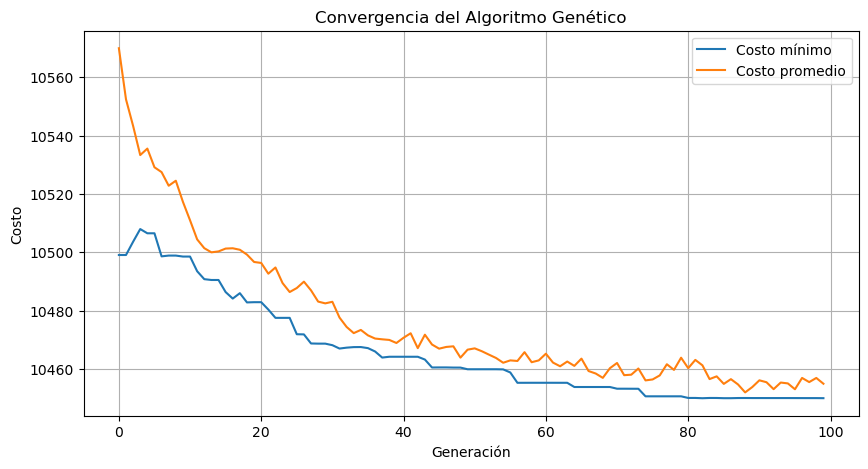

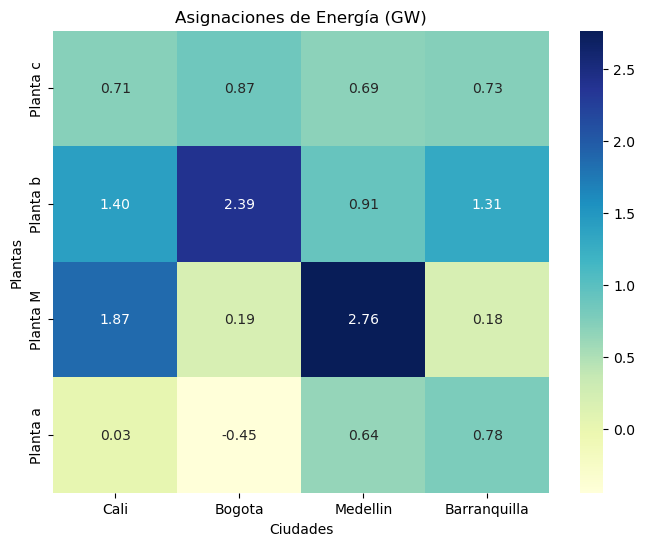

In [27]:
if __name__ == "__main__":
    main()

### 2 y 3

2. En el siguiente enlace se encuentra un programa Python para la solución del TSP (Traveling
Salesman Problem):
https://github.com/rocreguant/personal_blog/blob/main/Genetic_Algorithm_Python_Example/Tr
aveling_Salesman_Problem.ipynb
3. Estúdielo y úselo como laboratorio, usando diferentes tipos de selección y diferente número de
generaciones. Imprima las gráficas correspondientes.

Generación 0: Mejor distancia = 845.50
Generación 50: Mejor distancia = 830.34
Generación 100: Mejor distancia = 801.66
Generación 150: Mejor distancia = 847.39
Generación 200: Mejor distancia = 747.47
Generación 250: Mejor distancia = 801.48
Generación 300: Mejor distancia = 834.12
Generación 350: Mejor distancia = 745.56
Generación 400: Mejor distancia = 817.22
Generación 450: Mejor distancia = 816.62


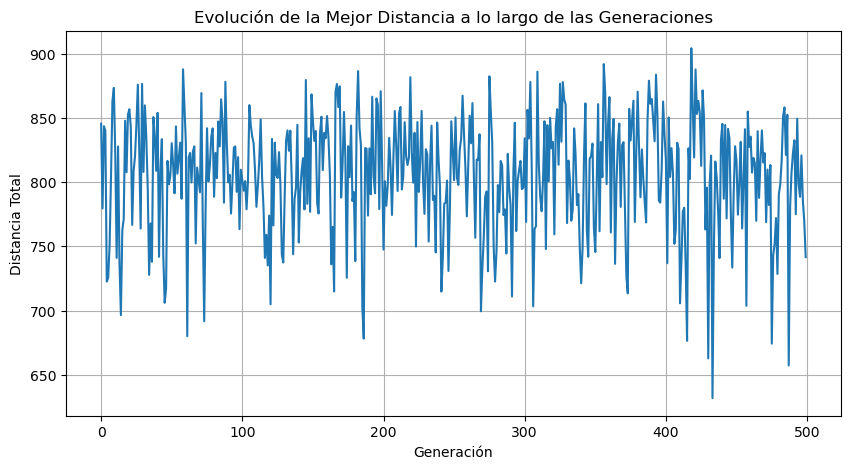

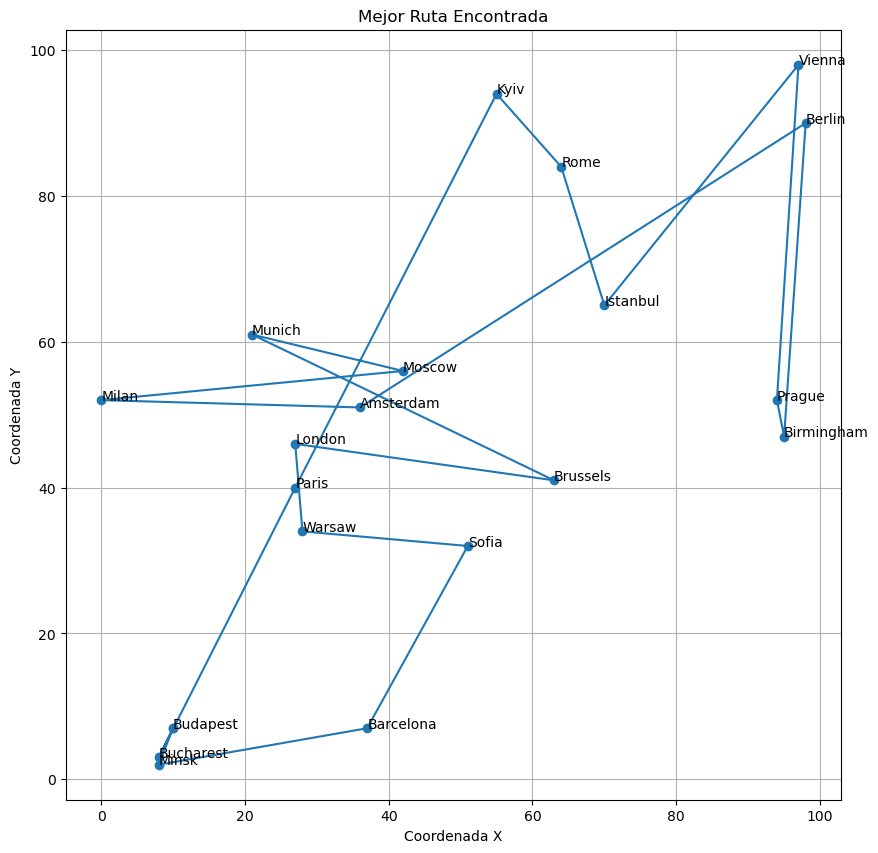


Mejor solución encontrada en la generación 433 con distancia total de 631.71 unidades.


In [30]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configuración inicial
n_cities = 20
n_population = 100
mutation_rate = 0.1

# Generación de coordenadas y nombres de ciudades
coordinates_list = [[x, y] for x, y in zip(np.random.randint(0, 100, n_cities), np.random.randint(0, 100, n_cities))]
names_list = np.array([
    'Berlin', 'London', 'Moscow', 'Barcelona', 'Rome', 'Paris', 'Vienna', 'Munich', 'Istanbul', 'Kyiv',
    'Bucharest', 'Minsk', 'Warsaw', 'Budapest', 'Milan', 'Prague', 'Sofia', 'Birmingham', 'Brussels', 'Amsterdam'
])
cities_dict = {x: y for x, y in zip(names_list, coordinates_list)}

# Funciones auxiliares
def compute_city_distance_coordinates(a, b):
    return np.hypot(a[0] - b[0], a[1] - b[1])

def compute_city_distance_names(city_a, city_b, cities_dict):
    return compute_city_distance_coordinates(cities_dict[city_a], cities_dict[city_b])

def genesis(city_list, n_population):
    population_set = []
    for _ in range(n_population):
        sol_i = np.random.permutation(city_list)
        population_set.append(sol_i)
    return np.array(population_set)

population_set = genesis(names_list, n_population)

def fitness_eval(city_list, cities_dict):
    total_distance = 0
    for i in range(n_cities - 1):
        a = city_list[i]
        b = city_list[i + 1]
        total_distance += compute_city_distance_names(a, b, cities_dict)
    # Añadimos la distancia desde la última ciudad a la primera para cerrar el ciclo
    total_distance += compute_city_distance_names(city_list[-1], city_list[0], cities_dict)
    fitness = 1 / (total_distance + 1e-6)  # Evitamos división por cero
    return fitness, total_distance

def get_all_fitness(population_set, cities_dict):
    fitness_list = np.zeros(n_population)
    distance_list = np.zeros(n_population)
    for i in range(n_population):
        fitness, total_distance = fitness_eval(population_set[i], cities_dict)
        fitness_list[i] = fitness
        distance_list[i] = total_distance
    return fitness_list, distance_list

fitness_list, distance_list = get_all_fitness(population_set, cities_dict)

def progenitor_selection(population_set, fitness_list):
    total_fit = fitness_list.sum()
    prob_list = fitness_list / total_fit

    progenitor_indices_a = np.random.choice(len(population_set), len(population_set), p=prob_list, replace=True)
    progenitor_indices_b = np.random.choice(len(population_set), len(population_set), p=prob_list, replace=True)

    progenitor_list_a = population_set[progenitor_indices_a]
    progenitor_list_b = population_set[progenitor_indices_b]

    return np.array([progenitor_list_a, progenitor_list_b])

progenitor_list = progenitor_selection(population_set, fitness_list)

def mate_progenitors(prog_a, prog_b):
    cut_point = np.random.randint(1, n_cities - 1)
    offspring = list(prog_a[:cut_point])

    for city in prog_b:
        if city not in offspring:
            offspring.append(city)

    return np.array(offspring)

def mate_population(progenitor_list):
    new_population_set = []
    for i in range(progenitor_list.shape[1]):
        prog_a, prog_b = progenitor_list[0][i], progenitor_list[1][i]
        offspring = mate_progenitors(prog_a, prog_b)
        new_population_set.append(offspring)
    return np.array(new_population_set)

new_population_set = mate_population(progenitor_list)

def mutate_offspring(offspring):
    offspring = offspring.copy()
    for _ in range(int(n_cities * mutation_rate)):
        a, b = np.random.randint(0, n_cities, size=2)
        offspring[a], offspring[b] = offspring[b], offspring[a]
    return offspring

def mutate_population(new_population_set):
    mutated_pop = []
    for offspring in new_population_set:
        mutated_pop.append(mutate_offspring(offspring))
    return np.array(mutated_pop)

mutated_pop = mutate_population(new_population_set)

# Bucle principal del algoritmo genético
best_fitness_history = []
best_solution = [-1, np.inf, np.array([])]
for generation in range(500):  # Reducimos el número de generaciones para agilizar la ejecución
    fitness_list, distance_list = get_all_fitness(population_set, cities_dict)

    min_distance = distance_list.min()
    if min_distance < best_solution[1]:
        best_solution[0] = generation
        best_solution[1] = min_distance
        best_solution[2] = population_set[distance_list == min_distance][0]

    best_fitness_history.append(min_distance)

    if generation % 50 == 0:
        print(f"Generación {generation}: Mejor distancia = {min_distance:.2f}")

    progenitor_list = progenitor_selection(population_set, fitness_list)
    new_population_set = mate_population(progenitor_list)
    mutated_pop = mutate_population(new_population_set)

    population_set = mutated_pop  # Actualizamos la población para la siguiente generación

# Gráfico de la evolución del fitness
plt.figure(figsize=(10, 5))
plt.plot(best_fitness_history)
plt.xlabel('Generación')
plt.ylabel('Distancia Total')
plt.title('Evolución de la Mejor Distancia a lo largo de las Generaciones')
plt.grid(True)
plt.show()

# Graficar la mejor ruta encontrada
best_route = best_solution[2]
x_coords = [cities_dict[city][0] for city in best_route] + [cities_dict[best_route[0]][0]]
y_coords = [cities_dict[city][1] for city in best_route] + [cities_dict[best_route[0]][1]]

plt.figure(figsize=(10, 10))
plt.plot(x_coords, y_coords, 'o-')
for city, x, y in zip(best_route, x_coords[:-1], y_coords[:-1]):
    plt.text(x, y, city)
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.title('Mejor Ruta Encontrada')
plt.grid(True)
plt.show()

print(f"\nMejor solución encontrada en la generación {best_solution[0]} con distancia total de {best_solution[1]:.2f} unidades.")


### 4

Genere aleatoriamente una población de 50 palabras, que se escuche por el parlante del
computador. Tomando como función de aptitud una palabra suya, usando AGs, con base en las
palabras generadas aleatoriamente llegue a la palabra que usó como función de aptitud.


In [31]:
!pip install pyttsx3


In [1]:
import random
import string
import pyttsx3
import time

# Configuración del motor de síntesis de voz
engine = pyttsx3.init()
voices = engine.getProperty('voices')
engine.setProperty('voice', voices[0].id)  # Puedes cambiar el índice para seleccionar otra voz
engine.setProperty('rate', 150)  # Velocidad de habla

# Parámetros del Algoritmo Genético
POPULATION_SIZE = 50
GENERATIONS = 1000
MUTATION_RATE = 0.01
TARGET_WORD = "evolution"  # Palabra objetivo (función de aptitud)

# Funciones auxiliares
def generate_random_word(length):
    letters = string.ascii_lowercase + 'áéíóúüñ'
    return ''.join(random.choice(letters) for _ in range(length))

def generate_initial_population(size, word_length):
    population = []
    for _ in range(size):
        word = generate_random_word(word_length)
        population.append(word)
    return population

def fitness_function(word):
    score = 0
    for i in range(len(word)):
        if word[i] == TARGET_WORD[i]:
            score += 1
    return score

def selection(population, fitness_scores):
    # Selección por ruleta
    total_fitness = sum(fitness_scores)
    selection_probs = [f / total_fitness for f in fitness_scores]
    parent_indices = random.choices(range(len(population)), weights=selection_probs, k=2)
    return population[parent_indices[0]], population[parent_indices[1]]

def crossover(parent1, parent2):
    # Cruzamiento de un punto
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutate(word):
    word = list(word)
    for i in range(len(word)):
        if random.random() < MUTATION_RATE:
            letters = string.ascii_lowercase + 'áéíóúüñ'
            word[i] = random.choice(letters)
    return ''.join(word)

def speak_word(word):
    engine.say(word)
    engine.runAndWait()

# Programa principal
def main():
    word_length = len(TARGET_WORD)
    population = generate_initial_population(POPULATION_SIZE, word_length)
    generation = 0
    found = False

    while not found and generation < GENERATIONS:
        generation += 1
        fitness_scores = [fitness_function(word) for word in population]

        # Verificar si se ha encontrado la palabra objetivo
        if TARGET_WORD in population:
            print(f"\n¡La palabra objetivo '{TARGET_WORD}' fue encontrada en la generación {generation}!")
            found = True
            # Reproducir la palabra encontrada
            speak_word(TARGET_WORD)
            break

        # Mostrar la mejor palabra de la generación actual
        max_fitness = max(fitness_scores)
        best_word = population[fitness_scores.index(max_fitness)]
        print(f"Generación {generation} - Mejor palabra: '{best_word}' - Aptitud: {max_fitness}/{word_length}")
        # Reproducir la mejor palabra
        speak_word(best_word)
        time.sleep(0.5)  # Pausa entre palabras

        # Crear nueva generación
        new_population = []
        while len(new_population) < POPULATION_SIZE:
            parent1, parent2 = selection(population, fitness_scores)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1)
            child2 = mutate(child2)
            new_population.extend([child1, child2])

        population = new_population[:POPULATION_SIZE]

    if not found:
        print(f"\nNo se encontró la palabra objetivo '{TARGET_WORD}' después de {GENERATIONS} generaciones.")

if __name__ == "__main__":
    main()


Generación 1 - Mejor palabra: 'iíbíütñwú' - Aptitud: 1/9
Generación 2 - Mejor palabra: 'sxosktxvj' - Aptitud: 2/9
Generación 3 - Mejor palabra: 'sxolütñwú' - Aptitud: 3/9
Generación 4 - Mejor palabra: 'éíoletxvú' - Aptitud: 3/9
Generación 5 - Mejor palabra: 'éíolctñwl' - Aptitud: 3/9
Generación 6 - Mejor palabra: 'éíolctñwú' - Aptitud: 3/9
Generación 7 - Mejor palabra: 'síoletíwú' - Aptitud: 3/9
Generación 8 - Mejor palabra: 'éíolctüks' - Aptitud: 3/9
Generación 9 - Mejor palabra: 'éíolctñwj' - Aptitud: 3/9
Generación 10 - Mejor palabra: 'éíolctñmx' - Aptitud: 3/9
Generación 11 - Mejor palabra: 'sxolctikx' - Aptitud: 4/9
Generación 12 - Mejor palabra: 'kxolctikx' - Aptitud: 4/9
Generación 13 - Mejor palabra: 'píoletikx' - Aptitud: 4/9
Generación 14 - Mejor palabra: 'éíolctikú' - Aptitud: 4/9
Generación 15 - Mejor palabra: 'éíolctikú' - Aptitud: 4/9
Generación 16 - Mejor palabra: 'éíoletikx' - Aptitud: 4/9
Generación 17 - Mejor palabra: 'súoletikx' - Aptitud: 4/9
Generación 18 - Mejor p

### 5. PYGAD

Suponga que usted es el jefe de gobierno y está interesado en que pasen los proyectos de su
programa político. Sin embargo, en el congreso conformado por 5 partidos, no es fácil su tránsito,
por lo que debe repartir el poder, conformado por ministerios y otras agencias del gobierno, con
base en la representación de cada partido. Cada entidad estatal tiene un peso de poder, que es el
que se debe distribuir. Suponga que hay 50 curules, distribuya aleatoriamente, con una distribución
no informe entre los 5 partidos esas curules. Defina una lista de 50 entidades y asígneles
aleatoriamente un peso político de 1 a 100 puntos. Cree una matriz de poder para repartir ese
poder, usando AGs.

In [16]:
pip install pygad

  Using cached pygad-3.3.1-py3-none-any.whl.metadata (19 kB)
  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
Using cached pygad-3.3.1-py3-none-any.whl (84 kB)
Using cached cloudpickle-3.0.0-py3-none-any.whl (20 kB)
Note: you may need to restart the kernel to use updated packages.


c:\Users\dmriv\AppData\Local\Programs\Python\Python312\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Mejor solución: [0 1 2 0 1 1 3 1 1 2 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 2 1 3 1 1 3 0 1 2 1 1 1
 1 2 3 0 0 0 0 2 1 1 1 0 1]
Aptitud de la mejor solución: 0.00046810343213436436
Distribución del poder político:
Partido 1: 556
Partido 2: 1309
Partido 3: 450
Partido 4: 227
Partido 5: 0


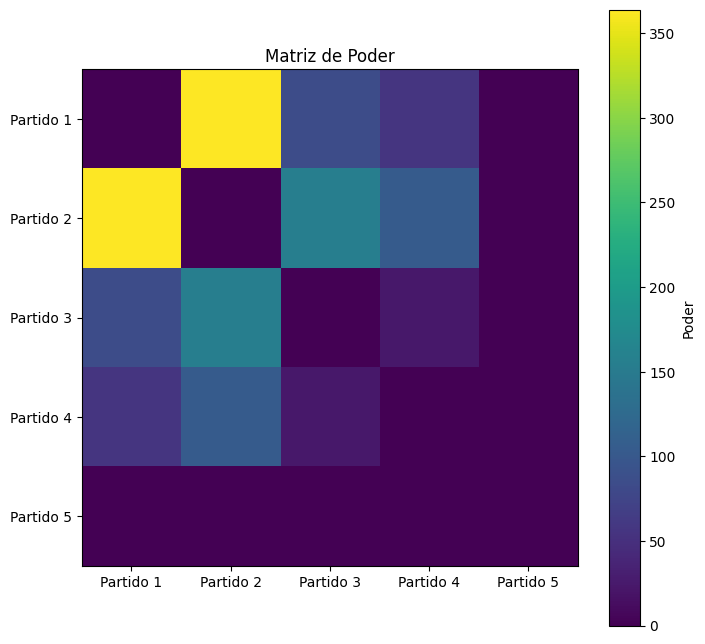

In [21]:
import pygad
import random

num_curules = 50
num_partidos = 5
curules_por_partido = [random.randint(1, num_curules) for _ in range(num_partidos)]
curules_por_partido[-1] = num_curules - sum(curules_por_partido[:-1])

num_entidades = 50
pesos_politicos = [random.randint(1, 100) for _ in range(num_entidades)]

def fitness_func(ga_instance, solution, solution_idx):
    poder_total = sum(pesos_politicos)
    poder_por_partido = [0] * num_partidos
    for i in range(num_entidades):
        partido = solution[i]
        poder_por_partido[partido] += pesos_politicos[i]
    
    diferencias = []
    for i in range(num_partidos):
        poder_esperado = poder_total * (curules_por_partido[i] / num_curules)
        diferencia = abs(poder_por_partido[i] - poder_esperado)
        diferencias.append(diferencia)
    
    aptitud = 1 / (1 + sum(diferencias))
    return aptitud

num_generations = 100
num_parents_mating = 4
population_size = 50
mutation_percent_genes = 10

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_func,
                       num_genes=num_entidades,
                       init_range_low=0,
                       init_range_high=num_partidos-1,
                       mutation_percent_genes=mutation_percent_genes,
                       gene_type=int,
                       sol_per_pop=population_size)  

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Mejor solución:", solution)
print("Aptitud de la mejor solución:", solution_fitness)

poder_por_partido = [0] * num_partidos
for i in range(num_entidades):
    partido = solution[i]
    poder_por_partido[partido] += pesos_politicos[i]

print("Distribución del poder político:")
for i in range(num_partidos):
    print(f"Partido {i+1}: {poder_por_partido[i]}")

matriz_poder = np.zeros((num_partidos, num_partidos))
for i in range(num_entidades):
    partido_i = solution[i]
    for j in range(i+1, num_entidades):
        partido_j = solution[j]
        if partido_i != partido_j:
            matriz_poder[partido_i][partido_j] += 1
            matriz_poder[partido_j][partido_i] += 1

plt.figure(figsize=(8, 8))
plt.imshow(matriz_poder, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Poder')
plt.xticks(range(num_partidos), ['Partido {}'.format(i+1) for i in range(num_partidos)])
plt.yticks(range(num_partidos), ['Partido {}'.format(i+1) for i in range(num_partidos)])
plt.title('Matriz de Poder')
plt.show()